In [1]:
# ref: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [5]:
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.841 auc=0.898


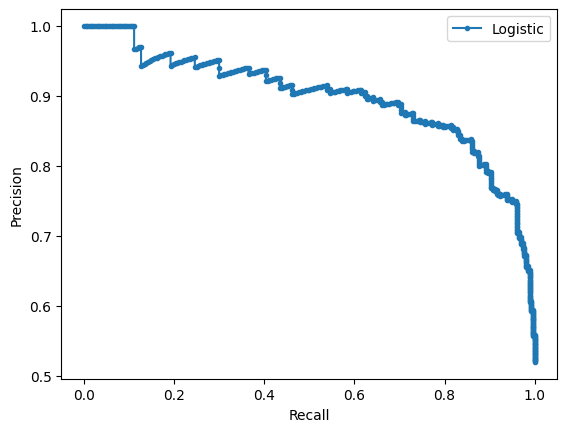

In [6]:
# no_skill = len(testy[testy==1]) / len(testy)
# plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [7]:
print(lr_recall[0:30])
print(lr_precision[0:30])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.52       0.52104208 0.52208835 0.52313883 0.52419355 0.52525253
 0.52631579 0.52738337 0.52845528 0.52953157 0.53061224 0.53169734
 0.53278689 0.5338809  0.53497942 0.53608247 0.53719008 0.53830228
 0.53941909 0.54054054 0.54166667 0.54279749 0.54393305 0.54507338
 0.54621849 0.54736842 0.54852321 0.54968288 0.55084746 0.55201699]


In [9]:
print(testy[0:30])
print(lr_probs[0:30])

[1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0]
[0.99597268 0.99799484 0.00529883 0.15237419 0.99833335 0.50006145
 0.01976314 0.02346338 0.9820007  0.70646518 0.00416202 0.7464466
 0.00766567 0.96195872 0.93521457 0.80765355 0.14480389 0.95653232
 0.15695751 0.94490876 0.86700762 0.41028206 0.02048157 0.66709375
 0.00426335 0.95669447 0.69257736 0.99440676 0.024916   0.55054268]
